<a href="https://colab.research.google.com/github/marianwitkowski/python-data/blob/master/nofluffjobs-stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza ogłoszeń w serwisie nofluffjobs.com

<table align="left" >
    <tr>
        <td bgcolor="#FFFFFF"><img width="32" height="32" align="absmiddle" src='https://www.dropbox.com/s/ok1ztwyuk1etbnx/logo.png?dl=1'/></td>
        <td bgcolor="#FFFFFF"><strong>
            <a href='https://www.linkedin.com/in/marianwitkowski/' target="_parent">  Marian Witkowski</a>    </strong></td>
    </tr>    
</table>


**Analizowano oferty dotyczące kontraktów B2B na terenie Polski**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
# zbiór próbek danych - fragment danych z nofluffjobs.com
df = pd.read_csv("https://raw.githubusercontent.com/marianwitkowski/python-data/master/nofluffjobs-sample.csv")

In [3]:
columns = ["id","title","category","technology"]
columns.extend( [c for c in df.columns if 'b2b' in c] )
columns.extend(["currency","post_url","posted"])
columns.extend( [c for c in df.columns if c.startswith('seniority')] )
columns.extend( [c for c in df.columns if c.startswith('perk_')] )
columns.extend( [c for c in df.columns if c.startswith('skill_')] )
columns.extend( [c for c in df.columns if c.startswith('benefits_')] )
df = df[columns]

In [4]:
cols = [c for c in df.columns if 'seniority_' in c]
for col in cols:
    df[col].replace(pd.np.NaN, 0, inplace=True)
    df[col] = df[col].astype('int8')
df.technology = df.technology.str.strip().str.upper()
df.category = df.category.str.upper()
df.technology.replace(pd.np.NaN, '', inplace=True)
df.technology.replace("", "Other", inplace=True)
df = df[(df.currency.str.lower()=='pln') & (df.salary_b2b_min>0) & (df.salary_b2b_max>0)]

## Liczba ogłoszeń dla poszczególnych kategorii

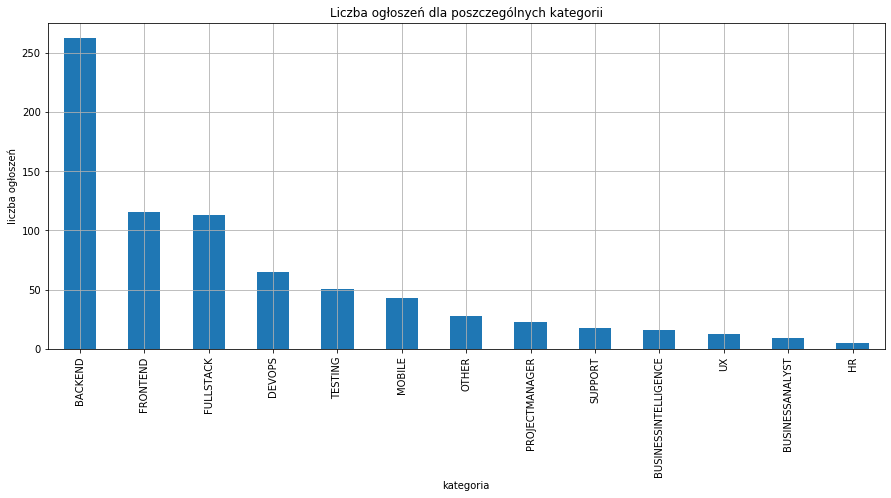

In [5]:
df.category.value_counts().plot(kind='bar', figsize=(15,6), grid=True)
plt.xlabel('kategoria')
plt.ylabel('liczba ogłoszeń')
plt.title('Liczba ogłoszeń dla poszczególnych kategorii')
plt.show()

## Liczba ogłoszeń dla poszczególnych technologii

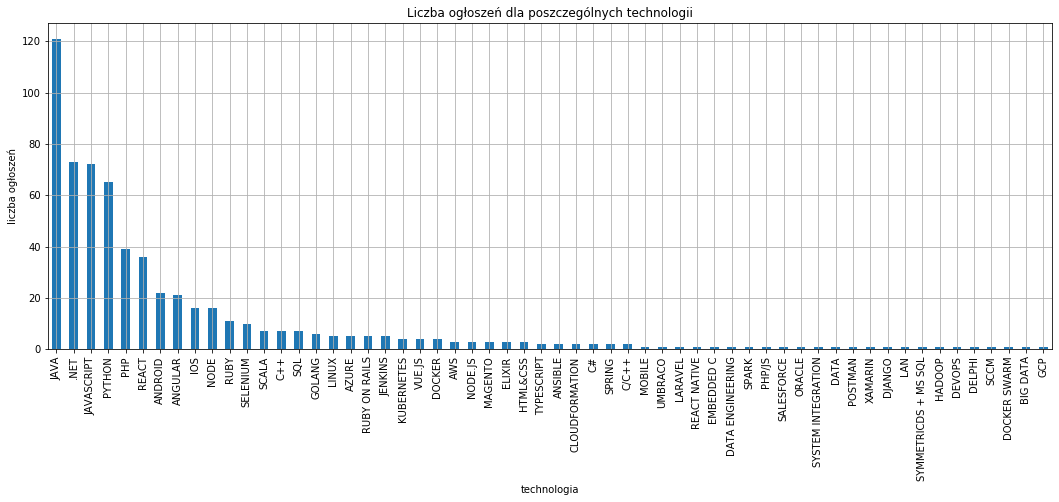

In [6]:
tech = df.technology
tech = tech[tech!="Other"]
tech.value_counts().plot(kind='bar', figsize=(18,6), grid=True)
plt.xlabel('technologia')
plt.ylabel('liczba ogłoszeń')
plt.title('Liczba ogłoszeń dla poszczególnych technologii')
plt.show()

In [7]:
def calc_avg_salary(x):
    #print(x["salary_b2b_min"], x["salary_b2b_max"], x["salary_b2b_period"])
    if (x["salary_b2b_period"]=="hour"):
        return [x["salary_b2b_min"]*168, x["salary_b2b_max"]*168]
    
    if (x["salary_b2b_period"]=="day"):
        return [ x["salary_b2b_min"]*21, x["salary_b2b_max"]*21 ]
    
    return [ x["salary_b2b_min"], x["salary_b2b_max"] ]

df_tmp = df[ ["salary_b2b_min","salary_b2b_max","salary_b2b_period","currency"] ]
df[["b2b_min_month", "b2b_max_month"]] = pd.DataFrame( df_tmp.apply(calc_avg_salary, axis=1).tolist(), 
                                                      index= df_tmp.index )
df["b2b_month_avg"] = (df["b2b_max_month"]+df["b2b_min_month"])/2

In [8]:
df1 = df[["id","title","category","technology","b2b_month_avg"]]

## Liczba ogłoszeń w poszczególnych technologiach

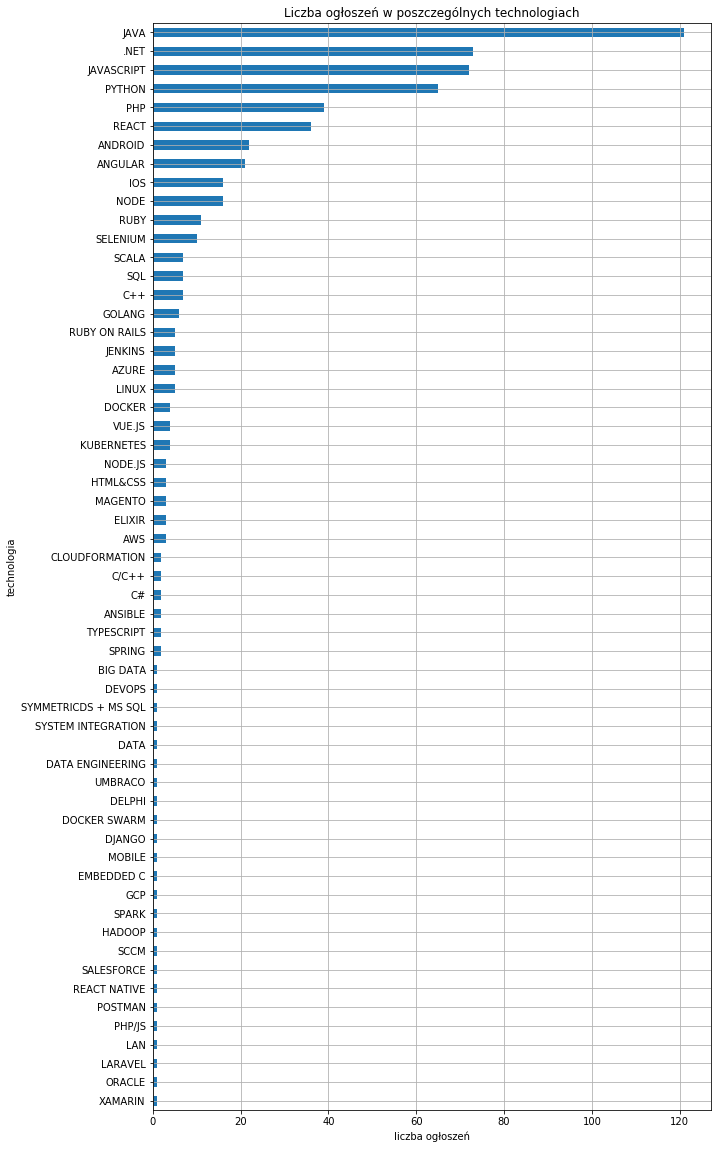

In [9]:
df1[df1.technology!="Other"].groupby('technology').\
        size().sort_values().plot(kind='barh', figsize=(10,20), grid=True)
plt.ylabel('technologia')
plt.xlabel('liczba ogłoszeń')
plt.title('Liczba ogłoszeń w poszczególnych technologiach')
plt.show()

## Rozkład wartości średniej kwot kontraktu (netto PLN)

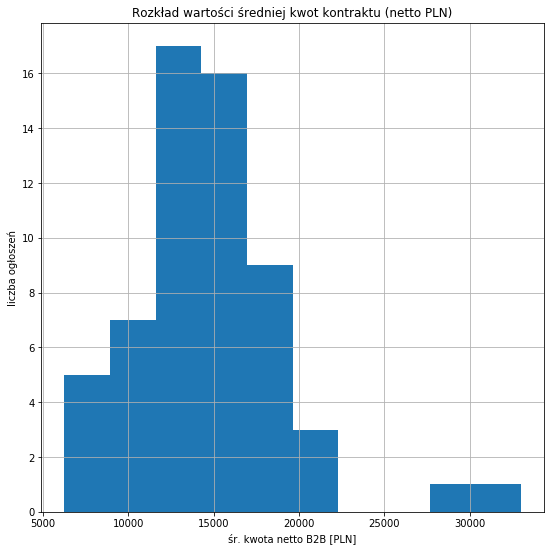

In [10]:
df1.groupby('technology')["b2b_month_avg"].mean().sort_values(ascending=False).hist(figsize=(9,9), bins=10)
plt.xlabel('śr. kwota netto B2B [PLN]')
plt.ylabel('liczba ogłoszeń')
plt.title('Rozkład wartości średniej kwot kontraktu (netto PLN)')
plt.show()

## Oferowane dodatki

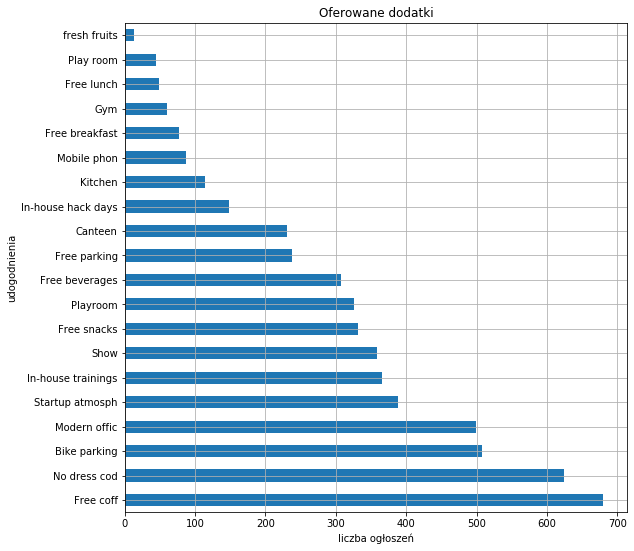

In [11]:
df_perks = df[ [c for c in df.columns if c.startswith('perk_')] ].sum().\
    sort_values(ascending=False).head(20)
df_perks.index = df_perks.index.str.strip('perk_')
df_perks.plot(kind='barh', figsize=(9,9), grid=True)
plt.xlabel('liczba ogłoszeń')
plt.ylabel('udogodnienia')
plt.title('Oferowane dodatki')
plt.show()

## Najczęściej poszukiwane umiejętności

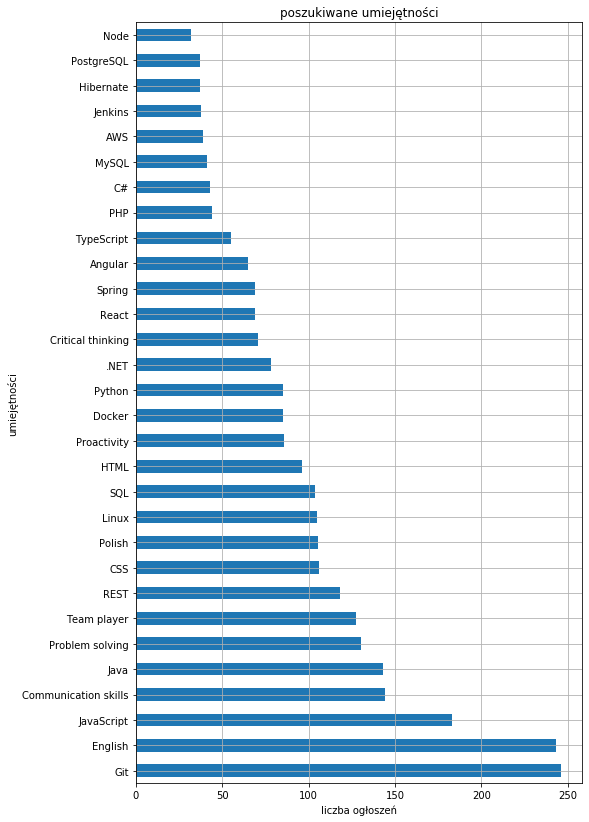

In [12]:
df_skill = df[[c for c in df.columns if c.startswith('skill_')]] 
df_skill = df_skill.replace(pd.np.NaN, 0).replace("main",1).replace("other",0.5)
df_skill = df_skill.sum().sort_values(ascending=False).head(30)
df_skill.index = df_skill.index.str[6:]
df_skill.plot(kind='barh',  figsize=(8,14), grid=True )
plt.xlabel('liczba ogłoszeń')
plt.ylabel('umiejętności')
plt.title('poszukiwane umiejętności')
plt.show()

## Oferowane benefity

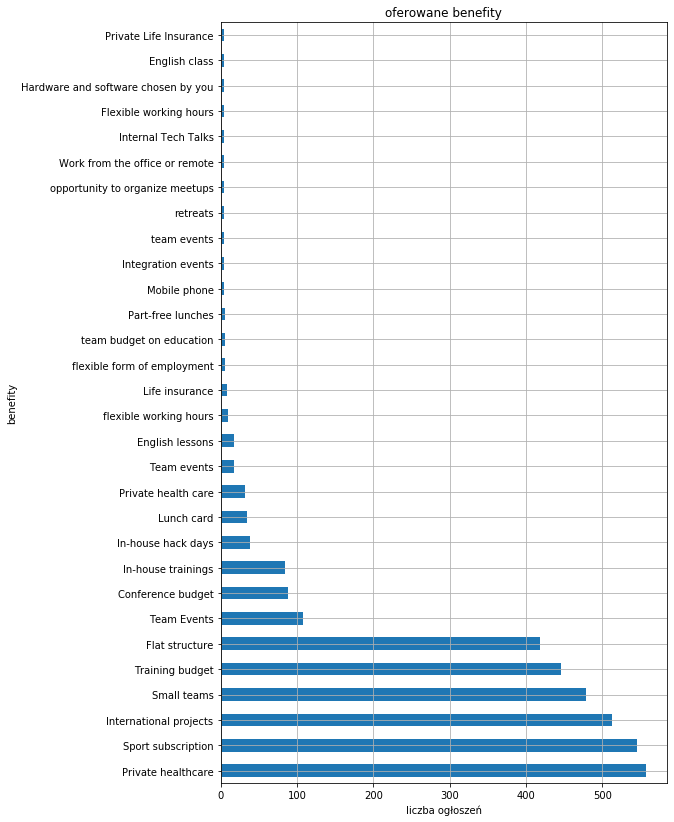

In [13]:
df_benefits = df[[c for c in df.columns if c.startswith('benefits_')]] 
df_benefits = df_benefits.replace(pd.np.NaN, 0)
df_benefits = df_benefits.sum().sort_values(ascending=False).head(30)
df_benefits.index = df_benefits.index.str[9:]
df_benefits.plot(kind='barh',  figsize=(8,14), grid=True )
plt.xlabel('liczba ogłoszeń')
plt.ylabel('benefity')
plt.title('oferowane benefity')
plt.show()